# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

When you have to book a hotel in a city that you don´t know, it is hard to know which hotels are better in terms of location. The aim of this project, is to group the hotels of one city by, we can say, its "flavour". By flavour, we mean how the **taste of the sorrounding area of each hotel** is. I think that selecting only the venues of our interest when we are travelling to another city, bucketing the hotels sharing common venues, and finally using wordmaps to get the big picture, we can have a proxy of what would be the taste of the sorrounding area of each hotel. To test this project I choose the **city of Boston**, as I was travelling very frequently there for almost three years, and I really want to come back again someday. The venues that we are selecting are:

* Monument / Landmark
* Historic Site
* Restaurants
* Coffee Shop
* Food & Drink Shop
* Bakery
* Park
* Museums
* River
* Irish Pub
* Steakhouse
* Lake
* Breakfast Spot
* Rental Car Location
* Pharmacy
* Harbor / Marina
* Street Food Gathering
* Train Station
* Bus Line

## Data <a name="data"></a>

The data we are using within this project are:

* Foursquare Data
* Coordinates of five selected areas from Boston. This coordinates was manually obtained using google.



# Methodology <a name="methodology"></a>

The steps followed to get the final buckets and its linked wordmaps are:

* We **choose five stragegic points of Boston** to cover the area of interest. There is a map showing where are the five points.
* We make a query to Four Square for each of the previous points to **get all the sorrounding hotels (radius = 10.000 meters)**.
* Then we have a **list of Hotels** with its coordinates. We drop duplicates and plot all the hotels in a new map.
* Next step is to make a query to four square **getting the sorrounding venues of each hotel (radious = 500 meters)**.
* We filter **only the desired venues** and normalize the data.
* Using the normalized data we perform the K means algorithmn setting the **number of buckets to 7**.
* We **plot the bucketted hotels** in a new map.
* Finally we **generate one wordmap** for each bucket so we can see what is the flavour of each bucket.
* Now we have to choose what is the bucket we like the most and book one of its hotels ;)

# Results and Discussion <a name="results"></a>

## Starting the Project
---

In [140]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

#### 1. Installing Folium to print the maps

In [2]:
!pip install folium

In [4]:
!pip install geopy

In [5]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#### 2. Getting the coordinates of the five strategic points:
* Boston Center.
* Harvard University.
* Dorchester.
* Brookline.
* Chelsea.

In [ ]:
#address = 'Boston'

#geolocator = Nominatim(user_agent="ny_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

In [10]:
# Latitude and Longitude of Boston. I get this coordinates from internet.

latitude = 42.361145
longitude = -71.057083
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Boston are 42.374443, -71.116943.


In [11]:
# Latitude and Longitude of Harvard University. I get this coordinates from internet.

latitude2 = 42.374443
longitude2 = -71.116943
print('The geograpical coordinate of Harvard University, Boston are {}, {}.'.format(latitude2, longitude2))


The geograpical coordinate of Harvard University, Boston are 42.374443, -71.116943.


In [12]:
# Latitude and Longitude of Dorchester. I get this coordinates from internet.

latitude3 = 42.302708
longitude3 = -71.072105
print('The geograpical coordinate of Dorchester, Boston are {}, {}.'.format(latitude3, longitude3))


The geograpical coordinate of Dorchester, Boston are 42.302708, -71.072105.


In [13]:
# Latitude and Longitude of Brookline. I get this coordinates from internet.

latitude4 = 42.332218
longitude4 = -71.121483
print('The geograpical coordinate of Brookline, Boston are {}, {}.'.format(latitude4, longitude4))

The geograpical coordinate of Brookline, Boston are 42.332218, -71.121483.


In [14]:
# Latitude and Longitude of Chelsea. I get this coordinates from internet.

latitude5 = 42.3917638
longitude5 = -71.0328284
print('The geograpical coordinate of Chelsea, Boston are {}, {}.'.format(latitude4, longitude4))


The geograpical coordinate of Chelsea, Boston are 42.332218, -71.121483.


#### 3. Plotting the strategic point in the map.

In [15]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
#for lat, lng, label in latitude, longitude, 'Toronto':
label = folium.Popup('Boston', parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    popup='Boston',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
folium.CircleMarker(
    [latitude2, longitude2],
    radius=5,
    popup='Harvard',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)
folium.CircleMarker(
    [latitude3, longitude3],
    radius=5,
    popup='Dorchester',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
folium.CircleMarker(
    [latitude4, longitude4],
    radius=5,
    popup='Brookline',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
folium.CircleMarker(
    [latitude5, longitude5],
    radius=5,
    popup='Chelsea',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
    
map_boston

## Getting the List of Hotels
---

#### 1. Conecting to Foursquare

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = ''
VERSION = '20180604' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


#### 2. Getting the Hotels sorrounding Boston Center

In [17]:
search_query = 'Hotel'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.361145,-71.057083&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel&radius=10000&limit=1000'

In [19]:
results = requests.get(url).json()

#### 3. Getting the Hotels sorrounding the Harvard University

In [20]:
search_query2 = 'Hotel2'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


In [21]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2,ACCESS_TOKEN, VERSION, search_query2, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.374443,-71.116943&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel2&radius=10000&limit=1000'

In [22]:
results2 = requests.get(url).json()

#### 4. Getting the Hotels sorrounding Dorchester

In [23]:
search_query3 = 'Hotel3'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


In [24]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude3, longitude3,ACCESS_TOKEN, VERSION, search_query3, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.302708,-71.072105&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel3&radius=10000&limit=1000'

In [25]:
results3 = requests.get(url).json()


#### 5. Getting the Hotels sorrounding Brookline

In [26]:
search_query4 = 'Hotel4'
radius = 10000
print(search_query + ' .... OK!')


Hotel .... OK!


In [27]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude4, longitude4,ACCESS_TOKEN, VERSION, search_query4, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.332218,-71.121483&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel4&radius=10000&limit=1000'

In [28]:
results4 = requests.get(url).json()


#### 5. Getting the Hotels sorrounding Chelsea

In [29]:
search_query5 = 'Hotel5'
radius = 10000
print(search_query5 + ' .... OK!')


Hotel5 .... OK!


In [30]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude5, longitude5,ACCESS_TOKEN, VERSION, search_query5, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.3917638,-71.0328284&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel5&radius=10000&limit=1000'

In [31]:
results5 = requests.get(url).json()

#### 6. Appending all the hotels in one single dataframe

In [32]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
data_hotels = json_normalize(venues)

venues2 = results2['response']['venues']
data_hotels2 = json_normalize(venues2)

venues3 = results3['response']['venues']
data_hotels3 = json_normalize(venues3)

venues4 = results4['response']['venues']
data_hotels4 = json_normalize(venues4)

venues5 = results5['response']['venues']
data_hotels5 = json_normalize(venues5)

data_hotels = data_hotels.append(data_hotels2, ignore_index=True)
data_hotels = data_hotels.append(data_hotels3, ignore_index=True)
data_hotels = data_hotels.append(data_hotels4, ignore_index=True)
data_hotels = data_hotels.append(data_hotels5, ignore_index=True)

C:\Users\x553865\AppData\Local\conda\conda\envs\PY3_6\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\x553865\AppData\Local\conda\conda\envs\PY3_6\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
C:\Users\x553865\AppData\Local\conda\conda\envs\PY3_6\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':
C:\Users\x553865\AppData\Local\conda\conda\envs\PY3_6\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':
C:\Users\x553865\AppData\Local\conda\conda\envs\PY3_6\lib\site-packages\ipykernel_launcher.py:15:

In [33]:
# filtering the desired columns
filtered_columns = ['name','location.address','location.lat','location.lng']
data_hotels_filtered = data_hotels.loc[:, filtered_columns]
data_hotels_filtered

name         location.address  \
0            Millennium Bostonian Hotel Boston              26 North St   
1                      Kimpton Nine Zero Hotel            90 Tremont St   
2                           Kimpton Onyx Hotel          155 Portland St   
3                   Hotel Indigo Boston Garden            280 Friend St   
4        The Envoy Hotel, Autograph Collection            70 Sleeper St   
..                                         ...                      ...   
245                                Elite Hotel            1 S Market St   
246  Avid Hotels Boston Logan Airport - Revere  405 American Legion Hwy   
247                         Kimpton Onyx Hotel          155 Portland St   
248                       Hyatt Regency Boston  One Avenue De Lafayette   
249                          Boston Park Plaza              50 Park Plz   

     location.lat  location.lng  
0       42.361006    -71.056066  
1       42.357388    -71.060696  
2       42.364204    -71.061363  
3       42.364785    -71.061598  
4       42.353762    -71.048124  
..            ...           ...  
245     42.359653    -71.055940  
246     42.420111    -71.001841  
247     42.364204    -71.061363  
248     42.353443    -71.060778  
249     42.350748    -71.069919  

[250 rows x 4 columns]

In [34]:
data_hotels_filtered.columns = ['Hotel','Address','Latitude','Longitude']
data_hotels_filtered.head()

Hotel          Address   Latitude  \
0      Millennium Bostonian Hotel Boston      26 North St  42.361006   
1                Kimpton Nine Zero Hotel    90 Tremont St  42.357388   
2                     Kimpton Onyx Hotel  155 Portland St  42.364204   
3             Hotel Indigo Boston Garden    280 Friend St  42.364785   
4  The Envoy Hotel, Autograph Collection    70 Sleeper St  42.353762   

   Longitude  
0 -71.056066  
1 -71.060696  
2 -71.061363  
3 -71.061598  
4 -71.048124

#### 7. Dropping duplicates to get the final list of hotels

In [35]:
data_hotels_filtered.groupby(['Hotel']).size()

Hotel
103.3 AMP Radio                                                     1
2 Earhart St                                                        1
28-40 Park Street                                                   1
2nd Street Cafe                                                     1
33 Adams                                                            1
                                                                   ..
enVision Hotel Boston                                               1
enVision Hotel Boston-Everett, an Ascend Hotel Collection Member    1
fwresh Barber shop                                                  1
hotel bellevue                                                      1
hotel envoy                                                         5
Length: 179, dtype: int64

After dropping duplicates we get the hotel list.

In [36]:
data_hotels_filtered.drop_duplicates(inplace= True)
data_hotels_filtered.groupby(['Hotel']).size()

Hotel
103.3 AMP Radio                                                     1
2 Earhart St                                                        1
28-40 Park Street                                                   1
2nd Street Cafe                                                     1
33 Adams                                                            1
                                                                   ..
enVision Hotel Boston                                               1
enVision Hotel Boston-Everett, an Ascend Hotel Collection Member    1
fwresh Barber shop                                                  1
hotel bellevue                                                      1
hotel envoy                                                         1
Length: 179, dtype: int64

#### 8. Plotting all the hotels in the Boston map

In [37]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(data_hotels_filtered['Latitude'], data_hotels_filtered['Longitude'], data_hotels_filtered['Hotel']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Getting All the Selected Venues Sorrounding the Hotels
---

#### 1. Getting the list of venues

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
boston_venues = getNearbyVenues(names=data_hotels_filtered['Hotel'],latitudes=data_hotels_filtered['Latitude'], longitudes=data_hotels_filtered['Longitude'])


Millennium Bostonian Hotel Boston
Kimpton Nine Zero Hotel
Kimpton Onyx Hotel
Hotel Indigo Boston Garden
The Envoy Hotel, Autograph Collection
Godfrey Hotel
Elite Hotel
Club Quarters Hotel in Boston
The Liberty Hotel
Four Seasons Hotel Boston
The Boxer Boston Hotel
The Langham Boston Hotel
Boston Harbor Hotel
Battery Wharf Hotel
XV Beacon Hotel
Scampo at The Liberty Hotel
Kimpton Marlowe Hotel
Liberty Hotel Gym
The Hotel Boston
Revere Hotel Boston Common
Liberty Hotel Valet
hotel envoy
Cambria Hotel Boston, Downtown-South Boston
Liberty Hotel Chestnut Meeting Room
Beacon Hill Hotel
Loews Boston Hotel
Seaport Hotel & World Trade Center
The Lenox Hotel
Fitness Center at Revere Hotel
Hotel 140
Eliot Hotel
Boston Center for Physical Therapy & Sports Medicine at The Seaport Hotel
Elite Hotel Boston
Sheraton Boston Hotel
Omni Boston Hotel at the Seaport
Hotel Commonwealth
Morgan Group Hotel
Hotel PekA
Renaissance Boston Waterfront Hotel
Langham Hotel Pool
Renaissance Hotel Concierge Lounge & 

In [93]:
boston_venues.head()

Hotel  Hotel Latitude  Hotel Longitude  \
0  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
1  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
2  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
3  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
4  Millennium Bostonian Hotel Boston       42.361006       -71.056066   

                                      Venue  Venue Latitude  Venue Longitude  \
0                      Boston Public Market       42.361950       -71.057466   
1                            North End Park       42.362488       -71.056477   
2  The Rose Kennedy Greenway - Mothers Walk       42.362640       -71.056407   
3                             Quincy Market       42.360106       -71.054881   
4                           Saus Restaurant       42.361076       -71.057054   

       Venue Category  
0              Market  
1                Park  
2                Park  
3       Historic Site  
4  Belgian Restaurant

In [94]:
# Checking that we are not loosing any hotel
boston_venues.Hotel.unique().shape

(179,)

#### 2. Exploring Venues Types

In [95]:
boston_venues['Venue Category'].unique()

array(['Market', 'Park', 'Historic Site', 'Belgian Restaurant',
       'Seafood Restaurant', 'Comedy Club', 'Record Shop', 'Coffee Shop',
       'Greek Restaurant', 'Deli / Bodega', 'Bakery', 'Sandwich Place',
       'Beer Bar', 'Monument / Landmark', 'Italian Restaurant',
       'Bagel Shop', 'Cosmetics Shop', 'Vegetarian / Vegan Restaurant',
       'Pizza Place', 'Donut Shop', 'Neighborhood', 'Yoga Studio',
       'Boutique', 'Bar', 'Circus', 'Food Truck',
       'Mediterranean Restaurant', 'Gourmet Shop', 'Pub', 'Hotel', 'Café',
       'Farmers Market', 'Irish Pub', 'Salad Place', 'Juice Bar',
       'Thai Restaurant', 'Fish Market', 'Salon / Barbershop',
       'Grocery Store', 'Pastry Shop', 'Trail', 'Steakhouse',
       'Asian Restaurant', 'Mexican Restaurant', 'Ski Chalet',
       'Falafel Restaurant', 'American Restaurant', 'Restaurant', 'Gym',
       'Library', 'New American Restaurant', 'French Restaurant',
       'Clothing Store', 'Sushi Restaurant', 'Gym / Fitness Center',


In [96]:
df_venues_type = pd.DataFrame (boston_venues['Venue Category'].unique(), columns=['Venue Category'])
df_venues_type.head()

Venue Category
0              Market
1                Park
2       Historic Site
3  Belgian Restaurant
4  Seafood Restaurant

In [97]:
df_venues_type[df_venues_type['Venue Category'].str.contains('Museum')]


Venue Category
69   History Museum
72           Museum
107      Art Museum
151  Science Museum

#### 3. Filtering the selected venues
The filtered venues are:
* Monument / Landmark
* Historic Site
* Restaurants
* Coffee Shop
* Food & Drink Shop
* Bakery
* Park
* Museums
* River
* Irish Pub
* Steakhouse
* Lake
* Breakfast Spot
* Rental Car Location
* Pharmacy
* Harbor / Marina
* Street Food Gathering
* Train Station
* Bus Line

In [98]:
keys = ['Museum','Restaurant']

df_venues_type_tobe_deleted = df_venues_type[~df_venues_type['Venue Category'].isin(['Hotel','Monument / Landmark','Historic Site','Coffee Shop','Food & Drink Shop','Bakery','Park','River','Irish Pub','Steakhouse','Lake','Breakfast Spot','Rental Car Location','Pharmacy','Harbor / Marina','Street Food Gathering','Train Station','Bus Line'])
                                            &
                                            ~df_venues_type['Venue Category'].str.contains('|'.join(keys))
                                            ]



df_venues_type_tobe_deleted

Venue Category
0             Market
5        Comedy Club
6        Record Shop
9      Deli / Bodega
11    Sandwich Place
..               ...
321        Multiplex
322  Nature Preserve
323      Flea Market
324      IT Services
325  Warehouse Store

[252 rows x 1 columns]

In [99]:
boston_venues.groupby('Hotel').count()

Hotel Latitude  \
Hotel                                                                
103.3 AMP Radio                                                 29   
2 Earhart St                                                    40   
28-40 Park Street                                               24   
2nd Street Cafe                                                 54   
33 Adams                                                        21   
...                                                            ...   
enVision Hotel Boston                                            6   
enVision Hotel Boston-Everett, an Ascend Hotel ...              19   
fwresh Barber shop                                              13   
hotel bellevue                                                  93   
hotel envoy                                                     68   

                                                    Hotel Longitude  Venue  \
Hotel                                                                        
103.3 AMP Radio                                                  29     29   
2 Earhart St                                                     40     40   
28-40 Park Street                                                24     24   
2nd Street Cafe                                                  54     54   
33 Adams                                                         21     21   
...                                                             ...    ...   
enVision Hotel Boston                                             6      6   
enVision Hotel Boston-Everett, an Ascend Hotel ...               19     19   
fwresh Barber shop                                               13     13   
hotel bellevue                                                   93     93   
hotel envoy                                                      68     68   

                                                    Venue Latitude  \
Hotel                                                                
103.3 AMP Radio                                                 29   
2 Earhart St                                                    40   
28-40 Park Street                                               24   
2nd Street Cafe                                                 54   
33 Adams                                                        21   
...                                                            ...   
enVision Hotel Boston                                            6   
enVision Hotel Boston-Everett, an Ascend Hotel ...              19   
fwresh Barber shop                                              13   
hotel bellevue                                                  93   
hotel envoy                                                     68   

                                                    Venue Longitude  \
Hotel                                                                 
103.3 AMP Radio                                                  29   
2 Earhart St                                                     40   
28-40 Park Street                                                24   
2nd Street Cafe                                                  54   
33 Adams                                                         21   
...                                                             ...   
enVision Hotel Boston                                             6   
enVision Hotel Boston-Everett, an Ascend Hotel ...               19   
fwresh Barber shop                                               13   
hotel bellevue                                                   93   
hotel envoy                                                      68   

                                                    Venue Category  
Hotel                                                               
103.3 AMP Radio                                                 29  
2 Earhart St                                                    40  
28-40 Park Stre

In [100]:
print('There are {} uniques categories.'.format(len(boston_venues['Venue Category'].unique())))

There are 326 uniques categories.


#### 4. Getting the number of venues by each hotel

In [101]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Hotel'] = boston_venues['Hotel'] 

In [102]:
boston_onehot.columns

Index(['ATM', 'Accessories Store', 'Afghan Restaurant', 'African Restaurant',
       'Airport', 'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Women's Store', 'Yoga Studio', 'Zoo',
       'Zoo Exhibit'],
      dtype='object', length=326)

In [103]:
# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[list(boston_onehot.columns).index('Hotel')]] + list(boston_onehot.columns[0:list(boston_onehot.columns).index('Hotel')]) + list(boston_onehot.columns[list(boston_onehot.columns).index('Hotel')+1:])

boston_onehot = boston_onehot[fixed_columns]

boston_onehot.columns

Index(['Hotel', 'ATM', 'Accessories Store', 'Afghan Restaurant',
       'African Restaurant', 'Airport', 'Airport Lounge', 'Airport Service',
       'Airport Terminal', 'American Restaurant',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Women's Store', 'Yoga Studio', 'Zoo',
       'Zoo Exhibit'],
      dtype='object', length=326)

In [104]:
boston_grouped = boston_onehot.groupby('Hotel').mean().reset_index()
boston_grouped.head()

Hotel  ATM  Accessories Store  Afghan Restaurant  \
0    103.3 AMP Radio  0.0                0.0           0.000000   
1       2 Earhart St  0.0                0.0           0.000000   
2  28-40 Park Street  0.0                0.0           0.000000   
3    2nd Street Cafe  0.0                0.0           0.018519   
4           33 Adams  0.0                0.0           0.000000   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                 0.0      0.0             0.0              0.0   
1                 0.0      0.0             0.0              0.0   
2                 0.0      0.0             0.0              0.0   
3                 0.0      0.0             0.0              0.0   
4                 0.0      0.0             0.0              0.0   

   Airport Terminal  American Restaurant  ...  Video Store  \
0               0.0             0.034483  ...          0.0   
1               0.0             0.075000  ...          0.0   
2               0.0             0.000000  ...          0.0   
3               0.0             0.037037  ...          0.0   
4               0.0             0.000000  ...          0.0   

   Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  Wine Shop  \
0               0.000000              0.0         0.0       0.0   0.000000   
1               0.000000              0.0         0.0       0.0   0.000000   
2               0.000000              0.0         0.0       0.0   0.041667   
3               0.018519              0.0         0.0       0.0   0.000000   
4               0.190476              0.0         0.0       0.0   0.000000   

   Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0            0.0          0.0  0.0          0.0  
1            0.0          0.0  0.0          0.0  
2            0.0          0.0  0.0          0.0  
3            0.0          0.0  0.0          0.0  
4            0.0          0.0  0.0          0.0  

[5 rows x 326 columns]

In [105]:
boston_grouped.shape

(179, 326)

We filter only the selected venues. In this dataframe the venues are columns.

In [106]:
boston_grouped_filtered = boston_grouped.drop(columns=df_venues_type_tobe_deleted['Venue Category'])

In [107]:
boston_grouped_filtered

Hotel  Afghan Restaurant  \
0                                      103.3 AMP Radio           0.000000   
1                                         2 Earhart St           0.000000   
2                                    28-40 Park Street           0.000000   
3                                      2nd Street Cafe           0.018519   
4                                             33 Adams           0.000000   
..                                                 ...                ...   
174                              enVision Hotel Boston           0.000000   
175  enVision Hotel Boston-Everett, an Ascend Hotel...           0.000000   
176                                 fwresh Barber shop           0.000000   
177                                     hotel bellevue           0.000000   
178                                        hotel envoy           0.000000   

     African Restaurant  American Restaurant  Arepa Restaurant  Art Museum  \
0                   0.0             0.034483               0.0    0.000000   
1                   0.0             0.075000               0.0    0.000000   
2                   0.0             0.000000               0.0    0.000000   
3                   0.0             0.037037               0.0    0.000000   
4                   0.0             0.000000               0.0    0.000000   
..                  ...                  ...               ...         ...   
174                 0.0             0.000000               0.0    0.000000   
175                 0.0             0.000000               0.0    0.000000   
176                 0.0             0.076923               0.0    0.000000   
177                 0.0             0.032258               0.0    0.000000   
178                 0.0             0.000000               0.0    0.029412   

     Asian Restaurant  Australian Restaurant    Bakery  Belgian Restaurant  \
0            0.000000                    0.0  0.000000                 0.0   
1            0.000000                    0.0  0.000000                 0.0   
2            0.000000                    0.0  0.083333                 0.0   
3            0.018519                    0.0  0.000000                 0.0   
4            0.000000                    0.0  0.000000                 0.0   
..                ...                    ...       ...                 ...   
174          0.000000                    0.0  0.000000                 0.0   
175          0.000000                    0.0  0.000000                 0.0   
176          0.000000                    0.0  0.000000                 0.0   
177          0.000000                    0.0  0.010753                 0.0   
178          0.044118                    0.0  0.029412                 0.0   

     ...  Taiwanese Restaurant  Tapas Restaurant  Thai Restaurant  \
0    ...                   0.0               0.0         0.000000   
1    ...                   0.0               0.0         0.000000   
2    ...                   0.0               0.0         0.041667   
3    ...                   0.0               0.0         0.018519   
4    ...                   0.0               0.0         0.000000   
..   ...                   ...               ...              ...   
174  ...                   0.0               0.0         0.000000   
175  ...                   0.0               0.0         0.000000   
176  ...                   0.0               0.0         0.000000   
177  ...                   0.0               0.0         0.000000   
178  ...                   0.0               0.0         0.000000   

     Theme Restaurant  Tibetan Restaurant  Train Station  Turkish Restaurant  \
0                 0.0                 0.0            0.0                 0.0   
1                 0.0                 0.0            0.0                 0.0   
2                 0.0                 0.0            0.0                 0.0   
3                 0.0                 0.0            0.0                 0.0   
4                 0.0

#### 5. Getting the 10 most common venues of each hotel

In [108]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Hotel']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hotels_venues_sorted = pd.DataFrame(columns=columns)
hotels_venues_sorted['Hotel'] = boston_grouped_filtered['Hotel']

for ind in np.arange(boston_grouped_filtered.shape[0]):
    hotels_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped_filtered.iloc[ind,:], num_top_venues)

hotels_venues_sorted.head()

Hotel  1st Most Common Venue 2nd Most Common Venue  \
0    103.3 AMP Radio    American Restaurant              Pharmacy   
1       2 Earhart St         Science Museum   American Restaurant   
2  28-40 Park Street                 Bakery            Restaurant   
3    2nd Street Cafe    American Restaurant                  Park   
4           33 Adams  Vietnamese Restaurant            Restaurant   

   3rd Most Common Venue          4th Most Common Venue  \
0             Steakhouse                           Park   
1                   Park                         Museum   
2      Korean Restaurant  Vegetarian / Vegan Restaurant   
3  Vietnamese Restaurant                       Pharmacy   
4   Caribbean Restaurant                           Park   

      5th Most Common Venue      6th Most Common Venue  7th Most Common Venue  \
0     Vietnamese Restaurant           Greek Restaurant     Falafel Restaurant   
1  Mediterranean Restaurant                   Pharmacy  Vietnamese Restaurant   
2           Thai Restaurant  Middle Eastern Restaurant       Sushi Restaurant   
3          Asian Restaurant         Chinese Restaurant            Coffee Shop   
4            Breakfast Spot    New American Restaurant    Rental Car Location   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant     Food & Drink Shop      French Restaurant  
1  Fast Food Restaurant     Food & Drink Shop      French Restaurant  
2      Greek Restaurant  Ethiopian Restaurant     Falafel Restaurant  
3     French Restaurant      Greek Restaurant     Italian Restaurant  
4        History Museum         Historic Site        Harbor / Marina

In [110]:
hotels_venues_sorted.shape

(179, 11)

## Clustering with K Means
---

#### 1. Executing K Means and getting clusters

After applying the Elbow Method, we choose to split the hotels in seven gruoups and using only the filtered venues. In this case the there is no clear "elbow", but the decrease in the distance between the points in the graphic turns to be more constant around K= 10. Plotting the results in a maps we think the better K is 7. 

Elbow Method

In [111]:
from sklearn.cluster import KMeans
# set number of clusters
distortions = []

boston_grouped_clustering = boston_grouped_filtered.drop('Hotel', 1)

K = range(1,80)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(boston_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

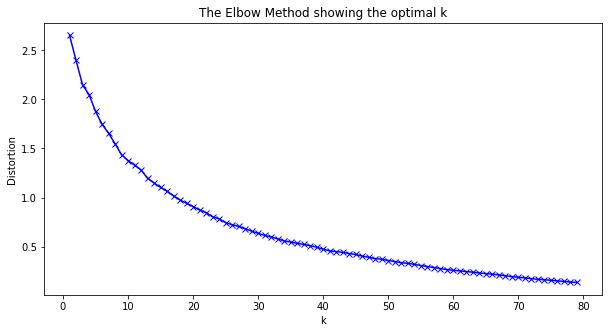

In [139]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [113]:

kclusters = 7

boston_grouped_clustering = boston_grouped_filtered.drop('Hotel', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 5])

#### 2. Assigning the clusters to each hotel

In [114]:
# add clustering labels
hotels_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

boston_merged = data_hotels_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each hotel
boston_merged = boston_merged.join(hotels_venues_sorted.set_index('Hotel'), on='Hotel')


In [115]:
boston_merged.head(10) # check the last columns!

Hotel            Address   Latitude  \
0      Millennium Bostonian Hotel Boston        26 North St  42.361006   
1                Kimpton Nine Zero Hotel      90 Tremont St  42.357388   
2                     Kimpton Onyx Hotel    155 Portland St  42.364204   
3             Hotel Indigo Boston Garden      280 Friend St  42.364785   
4  The Envoy Hotel, Autograph Collection      70 Sleeper St  42.353762   
5                          Godfrey Hotel  505 Washington St  42.354748   
6                            Elite Hotel      1 S Market St  42.359653   
7          Club Quarters Hotel in Boston  161 Devonshire St  42.356213   
8                      The Liberty Hotel     215 Charles St  42.362071   
9              Four Seasons Hotel Boston    200 Boylston St  42.352468   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -71.056066               1    Italian Restaurant    Seafood Restaurant   
1 -71.060696               5         Historic Site   American Restaurant   
2 -71.061363               5    Italian Restaurant                  Park   
3 -71.061598               5    Italian Restaurant           Coffee Shop   
4 -71.048124               5           Coffee Shop    Italian Restaurant   
5 -71.061613               5           Coffee Shop    Chinese Restaurant   
6 -71.055940               1    Italian Restaurant    Seafood Restaurant   
7 -71.057531               5         Historic Site           Coffee Shop   
8 -71.070095               6                 River     Hotpot Restaurant   
9 -71.068752               5                  Park   American Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery                  Park         Historic Site   
1           Coffee Shop            Steakhouse            Restaurant   
2           Coffee Shop    Seafood Restaurant                Bakery   
3                  Park    Seafood Restaurant   American Restaurant   
4            Steakhouse            Art Museum      Asian Restaurant   
5   American Restaurant      Asian Restaurant         Historic Site   
6         Historic Site                  Park                Bakery   
7   American Restaurant            Steakhouse    Seafood Restaurant   
8     French Restaurant                  Park                Bakery   
9    Italian Restaurant           Coffee Shop            Steakhouse   

      6th Most Common Venue    7th Most Common Venue  \
0               Coffee Shop      American Restaurant   
1        Mexican Restaurant  New American Restaurant   
2  Mediterranean Restaurant            Historic Site   
3       Japanese Restaurant                   Bakery   
4                    Bakery       Seafood Restaurant   
5        Italian Restaurant  New American Restaurant   
6               Coffee Shop      American Restaurant   
7                Restaurant       Mexican Restaurant   
8            History Museum       Mexican Restaurant   
9        Seafood Restaurant                     Lake   

           8th Most Common Venue     9th Most Common Venue  \
0  Vegetarian / Vegan Restaurant  Mediterranean Restaurant   
1                           Park        Falafel Restaurant   
2                     Restaurant                    Museum   
3       Mediterranean Restaurant                 Irish Pub   
4        New American Restaurant                Restaurant   
5                     Restaurant          Sushi Restaurant   
6  Vegetarian / Vegan Restaurant  Mediterranean Restaurant   
7        New American Restaurant        Falafel Restaurant   
8             Italian Restaurant         Indian Restaurant   
9                     Restaurant         French Restaurant   

     10th Most Common Venue  
0        Mexican Restaurant  
1        Seafood Restaurant  
2        Mexican Restaurant  
3                    Museum  
4  Mediterranean Restaurant  
5        Seafood Restaurant  
6          Greek Restaurant  
7                 Irish Pub  
8                 Irish Pub  
9

In [116]:
kclusters

7

#### 3. Plotting the clustered hotels

In [117]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Hotel'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Generating Wordclouds for each Cluster
---

The aim is to get the big picture of each cluster.

#### 1. Installing Wordcloud

In [118]:
# install wordcloud
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

In [119]:
stopwords = set(STOPWORDS)

#### 2. Defining the function for printing the wordclouds of each cluster

In [120]:
def draw_wordcloud (boston_cluster):
    
    # instantiate a word cloud object
    boston_cluster_wc = WordCloud(
        background_color='white',
        max_words=20000,
        stopwords=stopwords
    )

    boston_cluster_str = ''


    #'\s+'

    for column in boston_cluster.columns:
        if column != 'Hotel':
            boston_cluster[column].replace('\s+', '_',regex=True, inplace = True)
            boston_cluster[column].replace('\n', ' ',regex=True, inplace = True)
            boston_cluster_str = boston_cluster_str + str(boston_cluster[column]).replace(column,'').replace('Name:','').replace(',','').replace('dtype: object','').replace('Length','')

    #boston_cluster0_str = str(boston_cluster0.iloc[0:,1:]).replace('Common Venue','')

    # generate the word cloud
    boston_cluster_wc.generate(boston_cluster_str)

    fig = plt.figure()
    fig.set_figwidth(25) # set width
    fig.set_figheight(31) # set height

    # display the cloud
    plt.imshow(boston_cluster_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


### Cluster 0

In [121]:
boston_cluster0 = boston_merged.loc[boston_merged['Cluster Labels'] == 0, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster0

Hotel 1st Most Common Venue  \
11                            The Langham Boston Hotel    Seafood Restaurant   
12                                 Boston Harbor Hotel       Harbor / Marina   
26                  Seaport Hotel & World Trade Center    Seafood Restaurant   
31   Boston Center for Physical Therapy & Sports Me...    Seafood Restaurant   
34                    Omni Boston Hotel at the Seaport    Seafood Restaurant   
38                 Renaissance Boston Waterfront Hotel    Seafood Restaurant   
39                                  Langham Hotel Pool    Seafood Restaurant   
40            Renaissance Hotel Concierge Lounge & Bar    Seafood Restaurant   
43                              UrbanRide Bus To Hotel       Harbor / Marina   
132                       The Westin Boston Waterfront   American Restaurant   
150  MBTA Bus Stop #242 | Seaport Blvd @ Seaport Ho...    Seafood Restaurant   
208                                    56 Beacon Sweet    Mexican Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
11          Historic Site       Harbor / Marina                  Park   
12     Seafood Restaurant           Coffee Shop                  Park   
26             Steakhouse   American Restaurant            Restaurant   
31             Steakhouse   American Restaurant            Restaurant   
34    American Restaurant            Steakhouse            Restaurant   
38    American Restaurant            Steakhouse    Mexican Restaurant   
39          Historic Site       Harbor / Marina                  Park   
40    American Restaurant            Steakhouse            Restaurant   
43     Seafood Restaurant                  Park         Historic Site   
132            Restaurant            Steakhouse    Italian Restaurant   
150            Steakhouse   American Restaurant            Restaurant   
208       Harbor / Marina   American Restaurant       Thai Restaurant   

    5th Most Common Venue  6th Most Common Venue  \
11     Italian Restaurant    American Restaurant   
12    American Restaurant     Italian Restaurant   
26             Art Museum            Coffee Shop   
31                   Park             Art Museum   
34     Mexican Restaurant     Italian Restaurant   
38     Italian Restaurant             Restaurant   
39            Coffee Shop     Italian Restaurant   
40     Mexican Restaurant     Italian Restaurant   
43    American Restaurant     Italian Restaurant   
132           Coffee Shop     Seafood Restaurant   
150           Coffee Shop     Italian Restaurant   
208    Spanish Restaurant  Vietnamese Restaurant   

             7th Most Common Venue 8th Most Common Venue  \
11                     Coffee Shop                Bakery   
12         New American Restaurant            Steakhouse   
26              Mexican Restaurant       Harbor / Marina   
31                     Coffee Shop    Mexican Restaurant   
34   Vegetarian / Vegan Restaurant           Coffee Shop   
38                     Coffee Shop       Harbor / Marina   
39             American Restaurant                Bakery   
40                     Coffee Shop       Harbor / Marina   
43                       Irish Pub      Asian Restaurant   
132             Mexican Restaurant                  Park   
150                           Park            Art Museum   
208             Falafel Restaurant  Fast Food Restaurant   

    9th Most Common Venue   10th Most Common Venue  
11             Steakhouse      Monument / Landmark  
12                 Museum                Irish Pub  
26                   Park  New American Restaurant  
31        Harbor / Marina  New American Restaurant  
34                   Park  New American Restaurant  
38               Bus Line       Falafel Restaurant  
39             Steakhouse      Monument / Landmark  
40               Bus Line       Falafel Restaurant  
43                 Bakery       Belgian Restaurant  
132     French Restaurant       Falafel Restaurant  
150      Asian Re

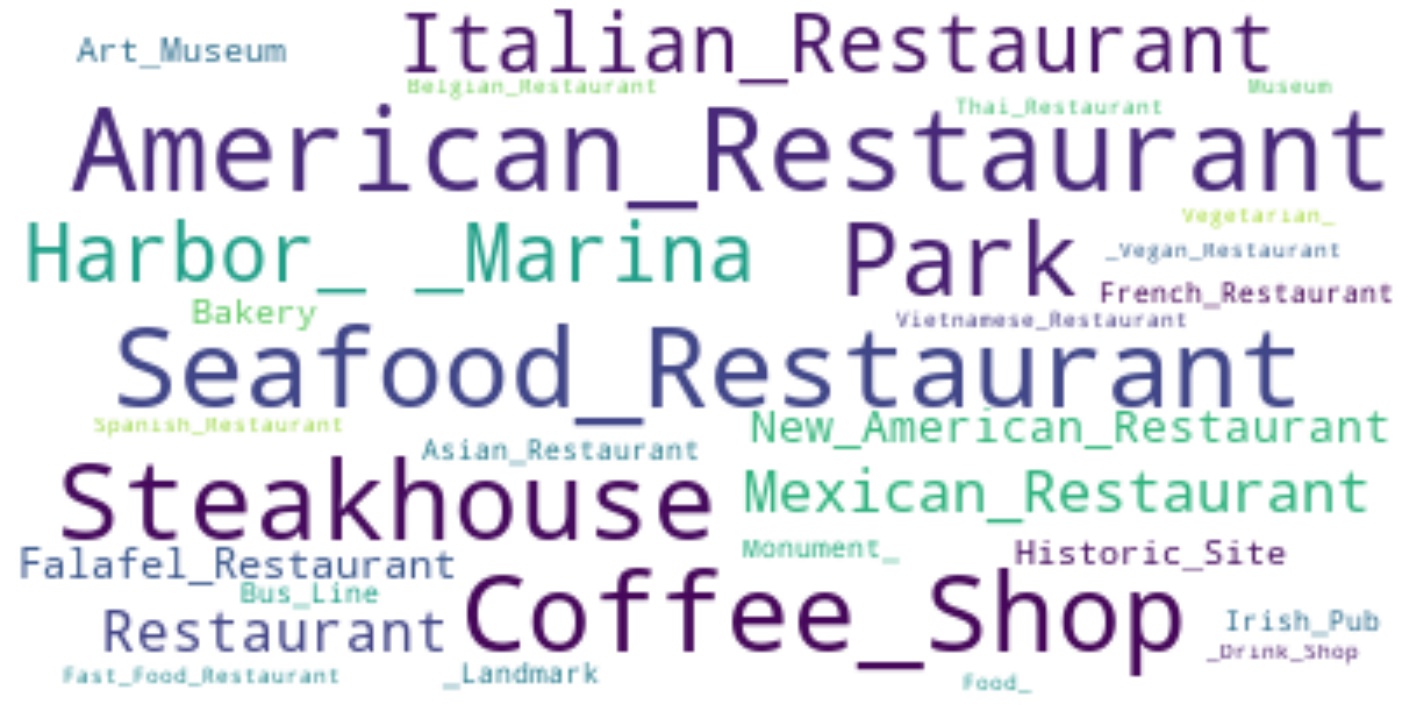

In [122]:
draw_wordcloud(boston_cluster0)

### Cluster 1

In [135]:
boston_cluster1 = boston_merged.loc[boston_merged['Cluster Labels'] == 1, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster1

Hotel 1st Most Common Venue  \
0            Millennium Bostonian Hotel Boston    Italian Restaurant   
6                                  Elite Hotel    Italian Restaurant   
13                         Battery Wharf Hotel    Italian Restaurant   
32                          Elite Hotel Boston    Italian Restaurant   
37                                  Hotel PekA    Italian Restaurant   
207                           59 Putnam Street    Mexican Restaurant   
212                            boston engine 5    Italian Restaurant   
217                              Linea 5, inc.    Italian Restaurant   
218       75 State Street Garage at 5 Broad St    Italian Restaurant   
232                                  North End    Italian Restaurant   
246  Avid Hotels Boston Logan Airport - Revere    Italian Restaurant   

    2nd Most Common Venue 3rd Most Common Venue      4th Most Common Venue  \
0      Seafood Restaurant                Bakery                       Park   
6      Seafood Restaurant         Historic Site                       Park   
13        Harbor / Marina                  Park         Seafood Restaurant   
32     Seafood Restaurant         Historic Site                       Park   
37     Seafood Restaurant                Bakery        American Restaurant   
207                  Park    Italian Restaurant  Latin American Restaurant   
212    Mexican Restaurant    Chinese Restaurant       Brazilian Restaurant   
217       Harbor / Marina    Seafood Restaurant                       Park   
218    Seafood Restaurant                  Park              Historic Site   
232    Seafood Restaurant                  Park                     Bakery   
246                Bakery        Breakfast Spot       Fast Food Restaurant   

         5th Most Common Venue  6th Most Common Venue  7th Most Common Venue  \
0                Historic Site            Coffee Shop    American Restaurant   
6                       Bakery            Coffee Shop    American Restaurant   
13               Historic Site     Mexican Restaurant            Coffee Shop   
32                      Bakery            Coffee Shop    American Restaurant   
37               Historic Site        Harbor / Marina                   Park   
207            Harbor / Marina   Brazilian Restaurant  Vietnamese Restaurant   
212  Latin American Restaurant                   Park    Peruvian Restaurant   
217        American Restaurant          Historic Site                 Bakery   
218                Coffee Shop                 Bakery    American Restaurant   
232                Coffee Shop          Historic Site    Japanese Restaurant   
246                Coffee Shop  Vietnamese Restaurant      Food & Drink Shop   

             8th Most Common Venue          9th Most Common Venue  \
0    Vegetarian / Vegan Restaurant       Mediterranean Restaurant   
6    Vegetarian / Vegan Restaurant       Mediterranean Restaurant   
13                          Bakery           Fast Food Restaurant   
32   Vegetarian / Vegan Restaurant       Mediterranean Restaurant   
37                     Coffee Shop                      Irish Pub   
207           Fast Food Restaurant              Food & Drink Shop   
212                      Irish Pub              Indian Restaurant   
217             Belgian Restaurant               Greek Restaurant   
218                Harbor / Marina  Vegetarian / Vegan Restaurant   
232             Mexican Restaurant               Asian Restaurant   
246              French Restaurant               Greek Restaurant   

       10th Most Common Venue  
0          Mexican Restaurant  
6            Greek Restaurant  
13          Food & Drink Shop  
32           Greek Restaurant  
37                 Restaurant  
207         French Restaurant  
212         Hotpot Restaurant  
217       Monument / Landmark  
218  Mediterranean Restaurant  
232           Thai Restaurant  
246           Harbor / Marina

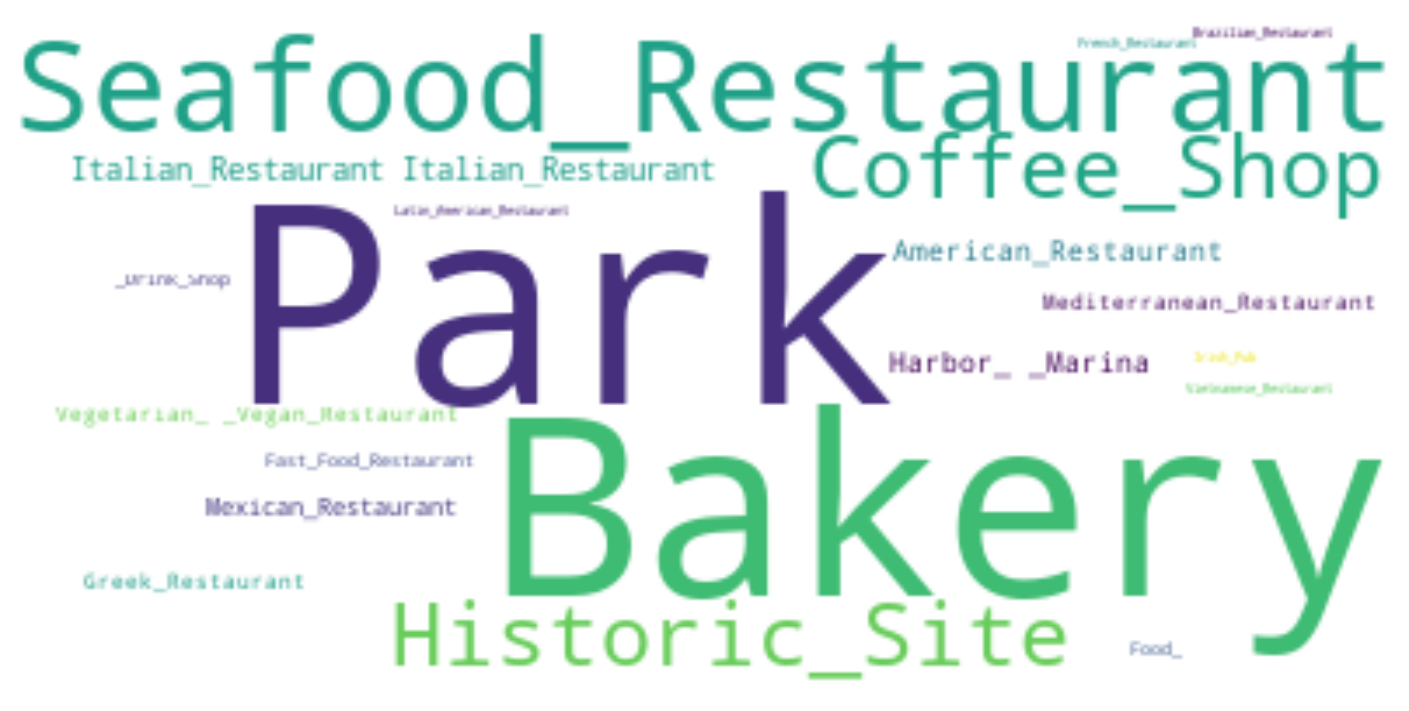

In [136]:
draw_wordcloud(boston_cluster1)

### Cluster 2

In [125]:
boston_cluster2 = boston_merged.loc[boston_merged['Cluster Labels'] == 2, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster2

Hotel 1st Most Common Venue  2nd Most Common Venue  \
81                    Route 2                  Park  Vietnamese Restaurant   
87             Rt 2 - Exit 60                  Park  Vietnamese Restaurant   
162                      MO4B                  Park  Vietnamese Restaurant   
172               49 Harrison                  Park  Vietnamese Restaurant   
182     enVision Hotel Boston                  Park  Vietnamese Restaurant   
187  Brookline Fire Station 4                  Park               Pharmacy   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
81     Dumpling Restaurant    Falafel Restaurant  Fast Food Restaurant   
87     Dumpling Restaurant    Falafel Restaurant  Fast Food Restaurant   
162    Dumpling Restaurant    Falafel Restaurant  Fast Food Restaurant   
172    Dumpling Restaurant    Falafel Restaurant  Fast Food Restaurant   
182    Dumpling Restaurant    Falafel Restaurant  Fast Food Restaurant   
187  Vietnamese Restaurant   Dumpling Restaurant    Falafel Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
81      Food & Drink Shop     French Restaurant      Greek Restaurant   
87      Food & Drink Shop     French Restaurant      Greek Restaurant   
162     Food & Drink Shop     French Restaurant      Greek Restaurant   
172     Food & Drink Shop     French Restaurant      Greek Restaurant   
182     Food & Drink Shop     French Restaurant      Greek Restaurant   
187  Fast Food Restaurant     Food & Drink Shop     French Restaurant   

    9th Most Common Venue 10th Most Common Venue  
81        Harbor / Marina          Historic Site  
87        Harbor / Marina          Historic Site  
162       Harbor / Marina          Historic Site  
172       Harbor / Marina          Historic Site  
182       Harbor / Marina          Historic Site  
187      Greek Restaurant        Harbor / Marina

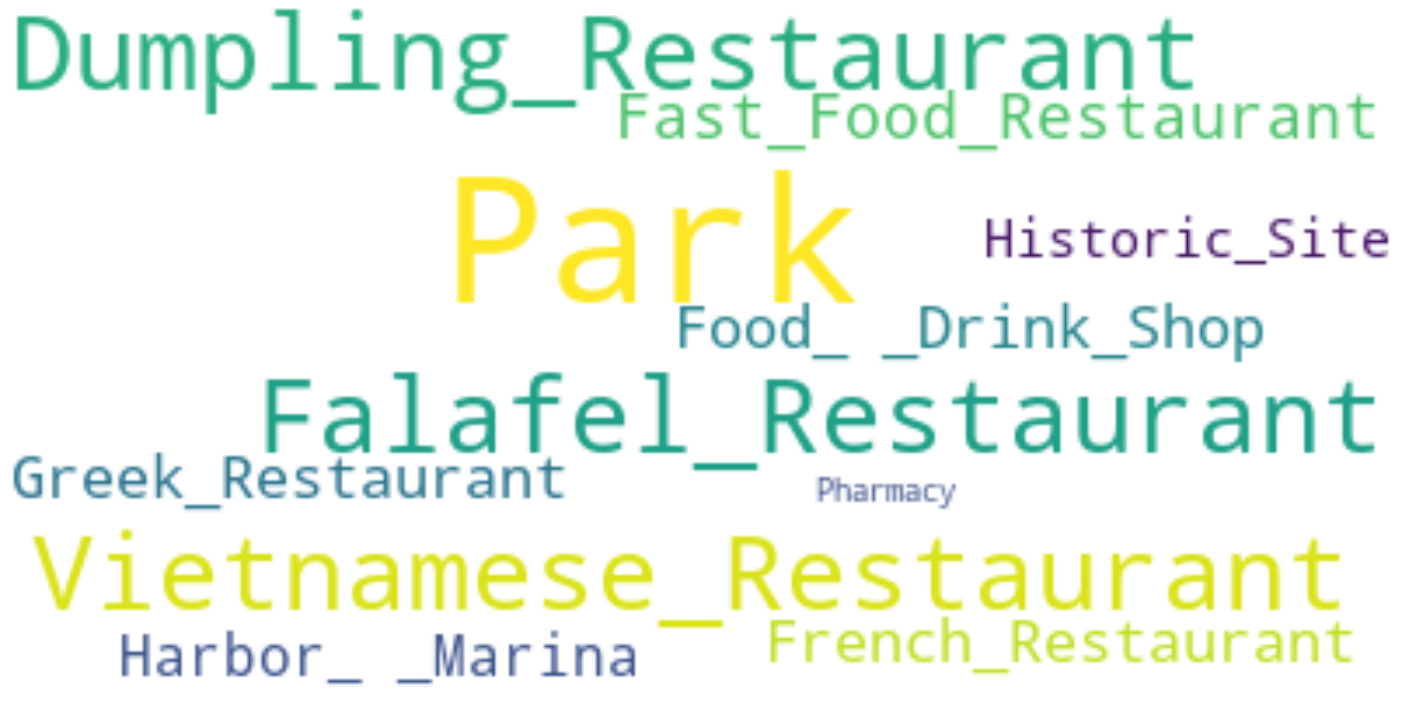

In [126]:
draw_wordcloud(boston_cluster2)

### Cluster 3

In [127]:
boston_cluster3 = boston_merged.loc[boston_merged['Cluster Labels'] == 3, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster3

Hotel 1st Most Common Venue  \
83                                          Terminal B           Coffee Shop   
110                            MBTA CT3-Andrew Station           Coffee Shop   
142                                    Baggage Claim A           Coffee Shop   
170                                     BIDMC Palmer 4           Coffee Shop   
178        City of Boston Public Works District 4 Yard           Coffee Shop   
205                                            Gate A5           Coffee Shop   
213                                         United 543           Coffee Shop   
216                                            Gate B5           Coffee Shop   
220                                            Gate C5           Coffee Shop   
222                                    Baggage Claim C           Coffee Shop   
225                                            Gate E5           Coffee Shop   
233                            Connolly's Publik House           Coffee Shop   
238  enVision Hotel Boston-Everett, an Ascend Hotel...           Coffee Shop   

     2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
83      Seafood Restaurant     Italian Restaurant    American Restaurant   
110     Chinese Restaurant      Polish Restaurant  Vietnamese Restaurant   
142     Seafood Restaurant    American Restaurant             Steakhouse   
170               Pharmacy     Falafel Restaurant   Fast Food Restaurant   
178                   Park      Afghan Restaurant    Rental Car Location   
205    American Restaurant     Seafood Restaurant     Italian Restaurant   
213  Vietnamese Restaurant    Dumpling Restaurant     Falafel Restaurant   
216     Seafood Restaurant     Italian Restaurant    American Restaurant   
220    American Restaurant     Seafood Restaurant  Vietnamese Restaurant   
222     Seafood Restaurant             Restaurant    American Restaurant   
225    American Restaurant     Seafood Restaurant  Vietnamese Restaurant   
233             Restaurant    American Restaurant     Seafood Restaurant   
238   Fast Food Restaurant  Vietnamese Restaurant    Dumpling Restaurant   

             5th Most Common Venue 6th Most Common Venue  \
83                      Restaurant      Asian Restaurant   
110                Harbor / Marina  Fast Food Restaurant   
142                     Restaurant      Asian Restaurant   
170  Vegetarian / Vegan Restaurant   American Restaurant   
178           Fast Food Restaurant     Hotpot Restaurant   
205                     Steakhouse            Restaurant   
213           Fast Food Restaurant     Food & Drink Shop   
216                     Restaurant      Asian Restaurant   
220                Harbor / Marina    Falafel Restaurant   
222               Asian Restaurant            Steakhouse   
225                Harbor / Marina    Falafel Restaurant   
233                         Bakery                  Park   
238             Falafel Restaurant     Food & Drink Shop   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
83                  Bakery    Chinese Restaurant            Steakhouse   
110      Food & Drink Shop     French Restaurant      Greek Restaurant   
142                 Bakery    Chinese Restaurant                  Park   
170                   Park       Harbor / Marina     Food & Drink Shop   
178     Falafel Restaurant     Food & Drink Shop     French Restaurant   
205       Asian Restaurant                Bakery    Chinese Restaurant   
213      French Restaurant      Greek Restaurant       Harbor / Marina   
216                 Bakery    Chinese Restaurant       Harbor / Marina   
220   Fast Food Restaurant     Food & Drink Shop     French Restaurant   
222  Vietnamese Restaurant      Greek Restaurant    Falafel Restaurant   
225   Fast Food Restaurant     Food & Drink Shop     French Restaurant   
233       Greek Restaurant    Falafel Restaurant  Fast Food Restaurant   
238      French Restaurant      Greek Restaurant       Harbo

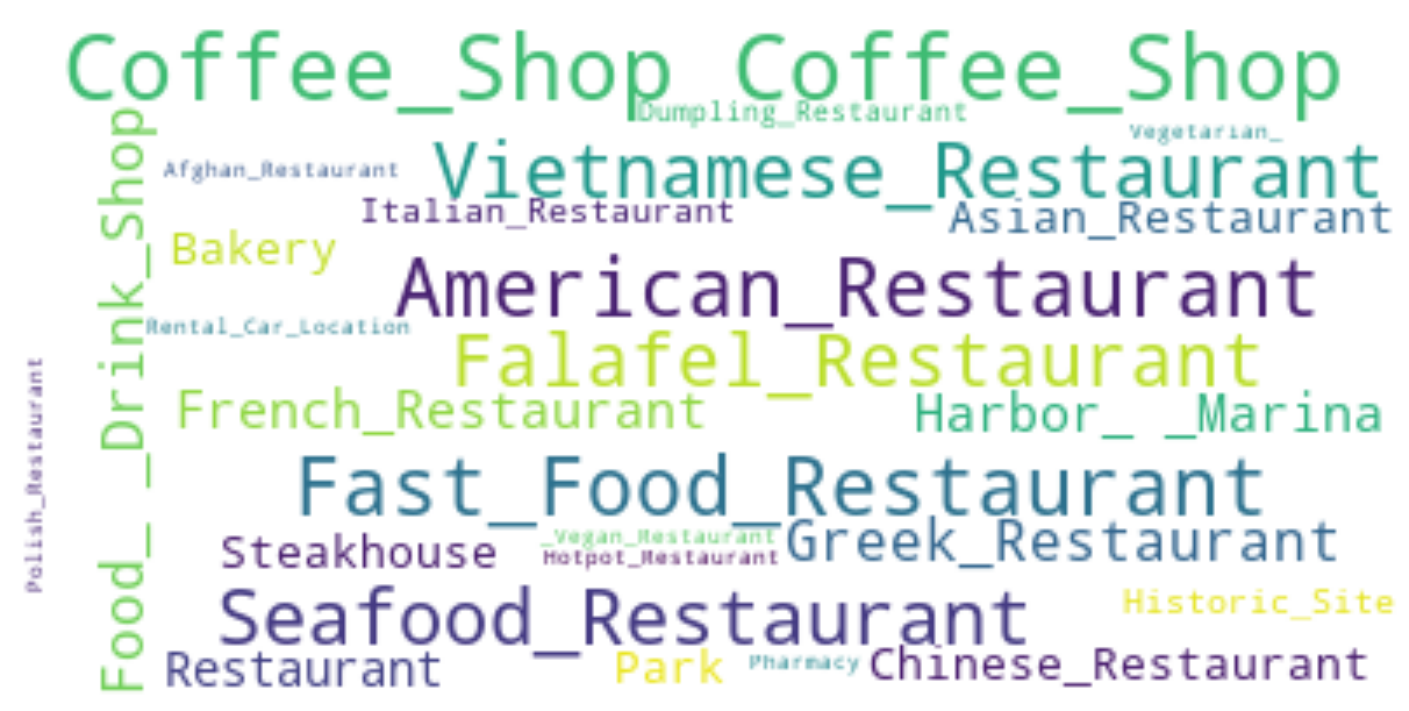

In [128]:
draw_wordcloud(boston_cluster3)

### Cluster 4

In [129]:
boston_cluster4 = boston_merged.loc[boston_merged['Cluster Labels'] == 4, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster4

Hotel 1st Most Common Venue  \
214  GL 55- Chelsea River East Boston   Rental Car Location   
215        Colwen Hotels / XSS Hotels   Rental Car Location   
242          Embassy Suites by Hilton   Rental Car Location   

     2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
214  Vietnamese Restaurant   Dumpling Restaurant     Falafel Restaurant   
215  Vietnamese Restaurant   Dumpling Restaurant     Falafel Restaurant   
242                   Park   American Restaurant  Vietnamese Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
214  Fast Food Restaurant     Food & Drink Shop     French Restaurant   
215  Fast Food Restaurant     Food & Drink Shop     French Restaurant   
242       Harbor / Marina    Falafel Restaurant  Fast Food Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
214      Greek Restaurant       Harbor / Marina          Historic Site  
215      Greek Restaurant       Harbor / Marina          Historic Site  
242     Food & Drink Shop     French Restaurant       Greek Restaurant

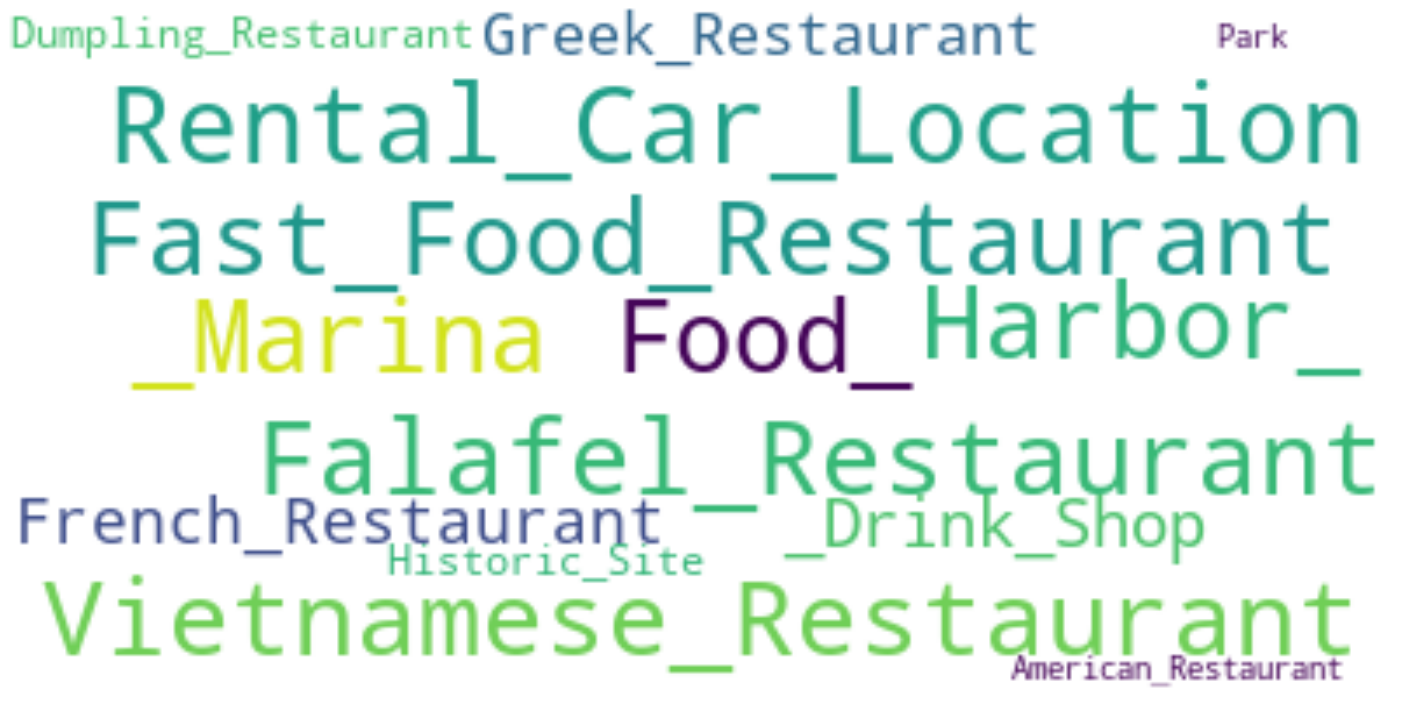

In [130]:
draw_wordcloud(boston_cluster4)

### Cluster 5

In [131]:
boston_cluster5 = boston_merged.loc[boston_merged['Cluster Labels'] == 5, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster5

Hotel 1st Most Common Venue  \
1                  Kimpton Nine Zero Hotel         Historic Site   
2                       Kimpton Onyx Hotel    Italian Restaurant   
3               Hotel Indigo Boston Garden    Italian Restaurant   
4    The Envoy Hotel, Autograph Collection           Coffee Shop   
5                            Godfrey Hotel           Coffee Shop   
..                                     ...                   ...   
237            MBTA Back Bay Station (BBY)   American Restaurant   
239                                The Row           Coffee Shop   
243                        5 Napkin Burger    Italian Restaurant   
244                                 Hilton           Coffee Shop   
248                   Hyatt Regency Boston           Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1     American Restaurant           Coffee Shop            Steakhouse   
2                    Park           Coffee Shop    Seafood Restaurant   
3             Coffee Shop                  Park    Seafood Restaurant   
4      Italian Restaurant            Steakhouse            Art Museum   
5      Chinese Restaurant   American Restaurant      Asian Restaurant   
..                    ...                   ...                   ...   
237           Coffee Shop    Seafood Restaurant    Italian Restaurant   
239   American Restaurant                  Park   Japanese Restaurant   
243           Coffee Shop    Seafood Restaurant                Bakery   
244    Seafood Restaurant       Harbor / Marina                  Park   
248    Chinese Restaurant                Bakery      Asian Restaurant   

    5th Most Common Venue     6th Most Common Venue  \
1              Restaurant        Mexican Restaurant   
2                  Bakery  Mediterranean Restaurant   
3     American Restaurant       Japanese Restaurant   
4        Asian Restaurant                    Bakery   
5           Historic Site        Italian Restaurant   
..                    ...                       ...   
237    Mexican Restaurant          Asian Restaurant   
239    Mexican Restaurant        Seafood Restaurant   
243      Greek Restaurant         French Restaurant   
244   American Restaurant                Restaurant   
248      Sushi Restaurant        Italian Restaurant   

               7th Most Common Venue          8th Most Common Venue  \
1            New American Restaurant                           Park   
2                      Historic Site                     Restaurant   
3                             Bakery       Mediterranean Restaurant   
4                 Seafood Restaurant        New American Restaurant   
5            New American Restaurant                     Restaurant   
..                               ...                            ...   
237                       Steakhouse              French Restaurant   
239  Southern / Soul Food Restaurant                     Steakhouse   
243                             Park                     Steakhouse   
244                    Historic Site                     Steakhouse   
248              American Restaurant  Vegetarian / Vegan Restaurant   

         9th Most Common Venue    10th Most Common Venue  
1           Falafel Restaurant        Seafood Restaurant  
2                       Museum        Mexican Restaurant  
3                    Irish Pub                    Museum  
4                   Restaurant  Mediterranean Restaurant  
5             Sushi Restaurant        Seafood Restaurant  
..                         ...                       ...  
237       Fast Food Restaurant   New American Restaurant  
239           Greek Restaurant          Ramen Restaurant  
243      Vietnamese Restaurant                Restaurant  
244         Italian Restaurant          Greek Restaurant  
248  Middle Eastern Restaurant        Dim Sum Restaurant  

[97 rows x 11 columns]

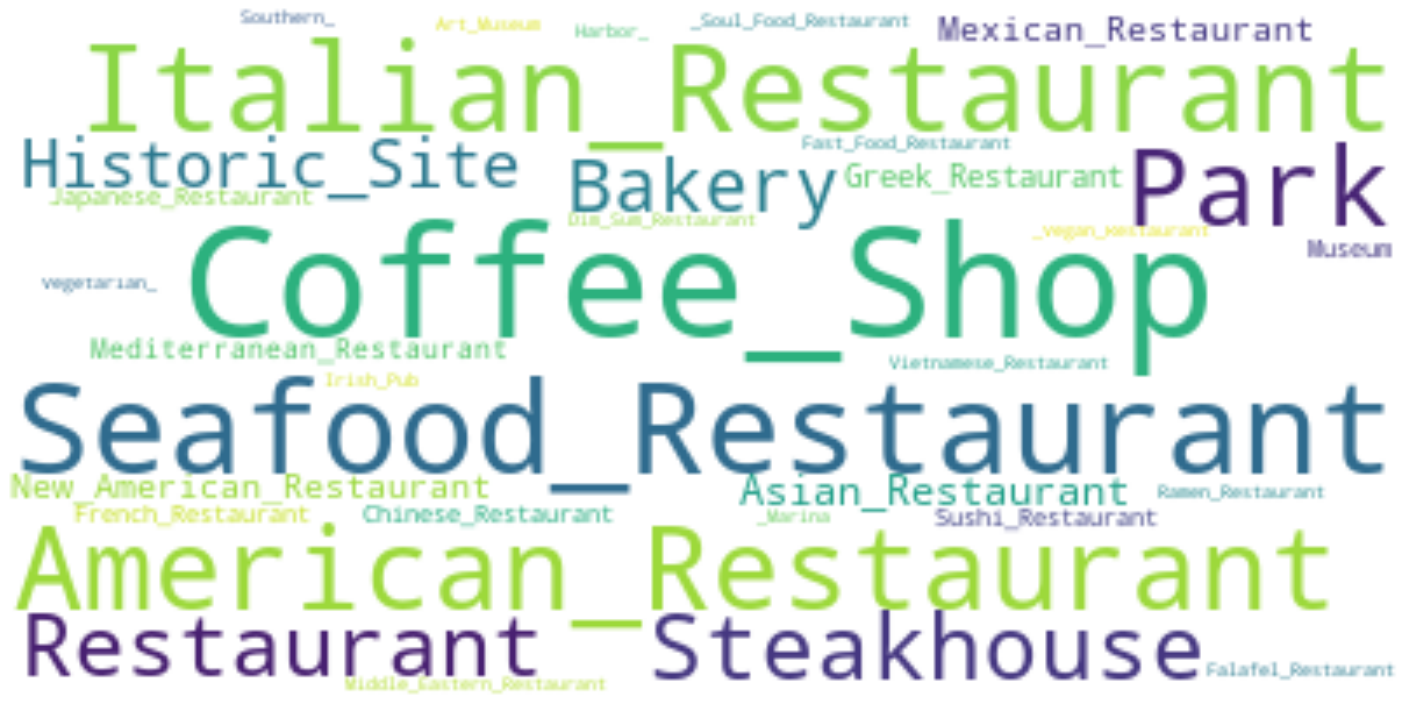

In [132]:
draw_wordcloud(boston_cluster5)

### Cluster 6

In [133]:
boston_cluster6 = boston_merged.loc[boston_merged['Cluster Labels'] == 6, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster6

Hotel  \
8                                    The Liberty Hotel   
15                         Scampo at The Liberty Hotel   
16                               Kimpton Marlowe Hotel   
17                                   Liberty Hotel Gym   
20                                 Liberty Hotel Valet   
23                 Liberty Hotel Chestnut Meeting Room   
24                                   Beacon Hill Hotel   
50                                       Hotel Veritas   
53               Inn At Harvard & Harvard Square Hotel   
54                                       O2 Vegan Café   
59                                                  O2   
61                                     2nd Street Cafe   
67                                           MIT 2-190   
70                   Peabody Terrace Children's Center   
77                                 The Training Room 2   
79                                 Bus Stop (CT2 + 47)   
85      Freepoint Hotel Cambridge, Tapestry Collection   
93                                 Ellison 2 Radiology   
98                                        2 Earhart St   
100                                         3DWorldPro   
102                            390 broadway somerville   
104                                    392 Columbia Rd   
106                                  Big City 101.3 FM   
108                                       331 adams st   
109                                 fwresh Barber shop   
115                        The Parenteau and Pug Hotel   
116                                           33 Adams   
118  Andrew 3 Custom Upholstery Slip Covers Refinis...   
137                         Wright Digital 3-D Theater   
149                                    103.3 AMP Radio   
152                                         Hotel Emma   
157                         College of General Studies   
159                                   G4 Guitar School   
169                                 453 Washington St.   
171                                  28-40 Park Street   
175                                 Copley Plaza Hotel   
193                                 MIT East Campus 4W   
201                                      Hotel Stanley   
203                              Boston Fire Engine 50   
221                    A.J. Cabrita Hoteleria Bar Cafe   
226          Yawkey 5E | Corrigan Mineham Heart Center   
241        The Prescott International Hotel And Hostel   

             1st Most Common Venue      2nd Most Common Venue  \
8                            River          Hotpot Restaurant   
15                           River          Hotpot Restaurant   
16                  Science Museum        American Restaurant   
17                           River                       Park   
20                           River          Hotpot Restaurant   
23                           River          Hotpot Restaurant   
24                            Park                       Lake   
50                            Park           Sushi Restaurant   
53   Vegetarian / Vegan Restaurant                     Bakery   
54                            Park           Sushi Restaurant   
59                            Park           Sushi Restaurant   
61             American Restaurant                       Park   
67             Rental Car Location                       Park   
70                            Park           Sushi Restaurant   
77         New American Restaurant          Indian Restaurant   
79              Chinese Restaurant                   Pharmacy   
85           Vietnamese Restaurant           Sushi Restaurant   
93                  History Museum          Hotpot Restaurant   
98                  Science Museum        American Restaurant   
100          Vietnamese Restaurant          Korean Restaurant   
102           Fast Food Restaurant      Vietnamese Restaurant   
104          Vietnamese Restaurant          Korean Restaurant   
106           Fast Food Restaurant      Vietnamese Restaura

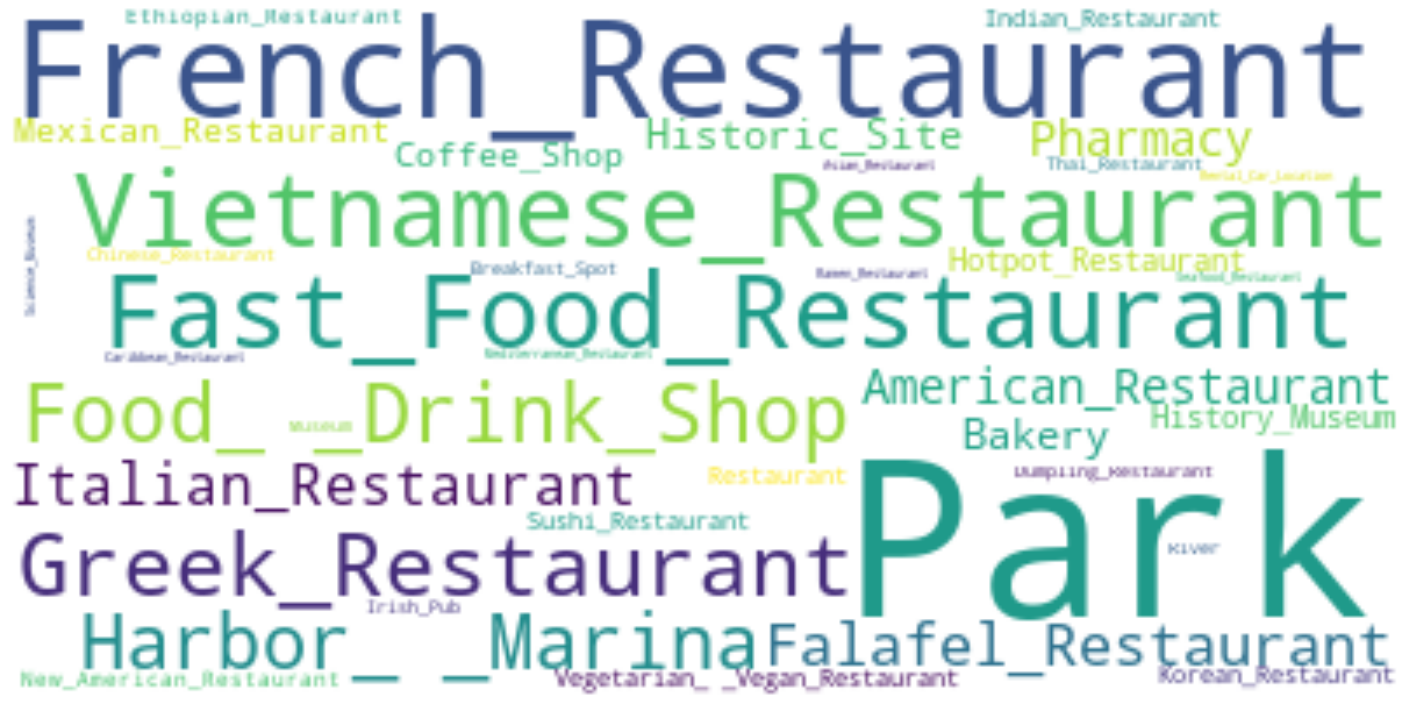

In [134]:
draw_wordcloud(boston_cluster6)

## Conclusion <a name="conclusion"></a>

As this is only a first approach, using wordclouds and the K Means algorithm we can get the big picture of the sorrounding áreas of every hotel in a city. 

This information can help us choosing one hotel when we have to travel to a new city. 